# Import libraries

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import mixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# Import data

In [119]:
# envP7Path = os.getenv("P7Path")
# print(envP7Path)

# Load labeled training data
file_path = r'Validation_data.csv'
Validation_labels = pd.read_csv(file_path)

# Load labeled test data
Test_data = Validation_labels.drop(columns=['Label'])
Test_data.to_csv(r'Test_data.csv')
Labeled_data = pd.read_csv(r'Labeled_data.csv')



Prepare data for Training and Validation

In [120]:
# For the labeled dataset. Remove the filenames and labels
X_labeled = Labeled_data.drop(['Filename', 'Label'], axis=1)
Y_labeled = Labeled_data['Label']

# For the validation dataset. Remove the filenames and labels
X_validation = Validation_labels.drop(['Filename', 'Label'], axis=1)
Y_validation = Validation_labels['Label']


Train the Random Forest Model

In [121]:
# Train the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_labeled, Y_labeled)

# Predict the labels
Y_pred = rf_classifier.predict(X_validation)

# Calculate the accuracy
accuracy = np.mean(Y_pred == Y_validation)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


Label the Unlabeled Data

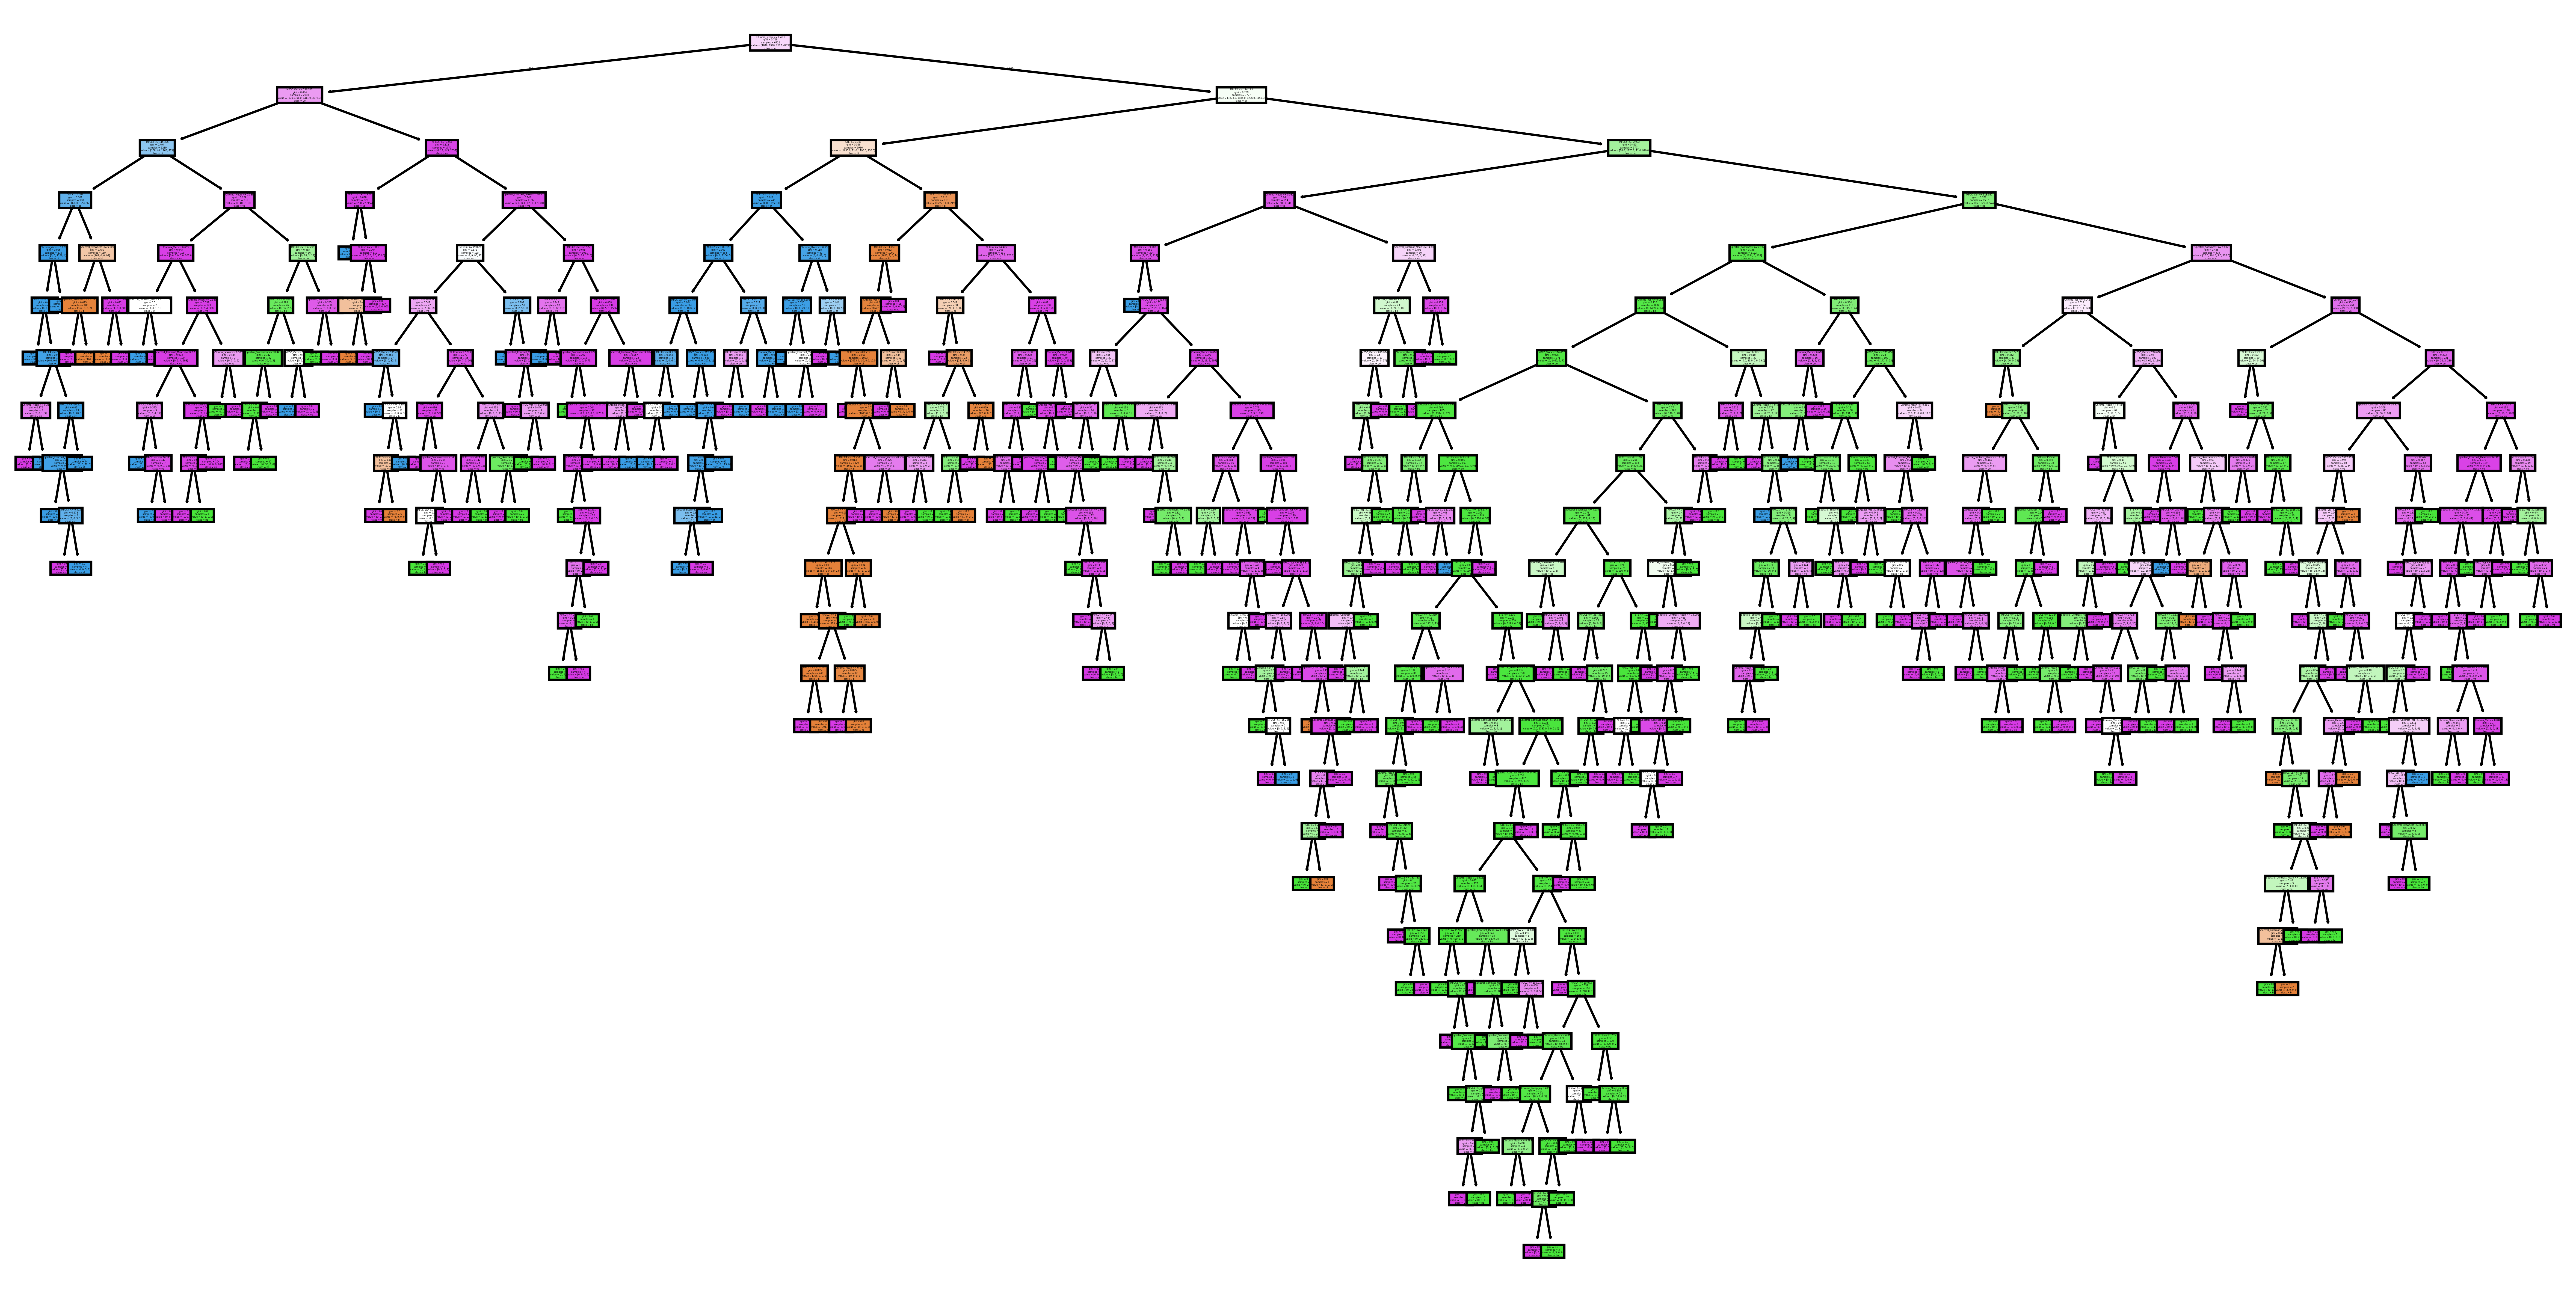

In [122]:
# Prepare the unlabelled data
X_test = Test_data.drop(['Filename'], axis=1)

# Predict the labels
Y_test = rf_classifier.predict(X_test)

# Add the predicted labels to the test data
Test_data['Predicted label'] = Y_test

# Save the test data with the predicted labels
Test_data.to_csv(r'Test_data_prediction.csv')

# Plot the first tree in the forest with higher quality and show the value of the labels

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=600)

plot_tree(rf_classifier.estimators_[0], 
          feature_names=X_test.columns, 
          filled=True, 
          ax=axes, 
          class_names=rf_classifier.classes_.astype(str))

plt.show()



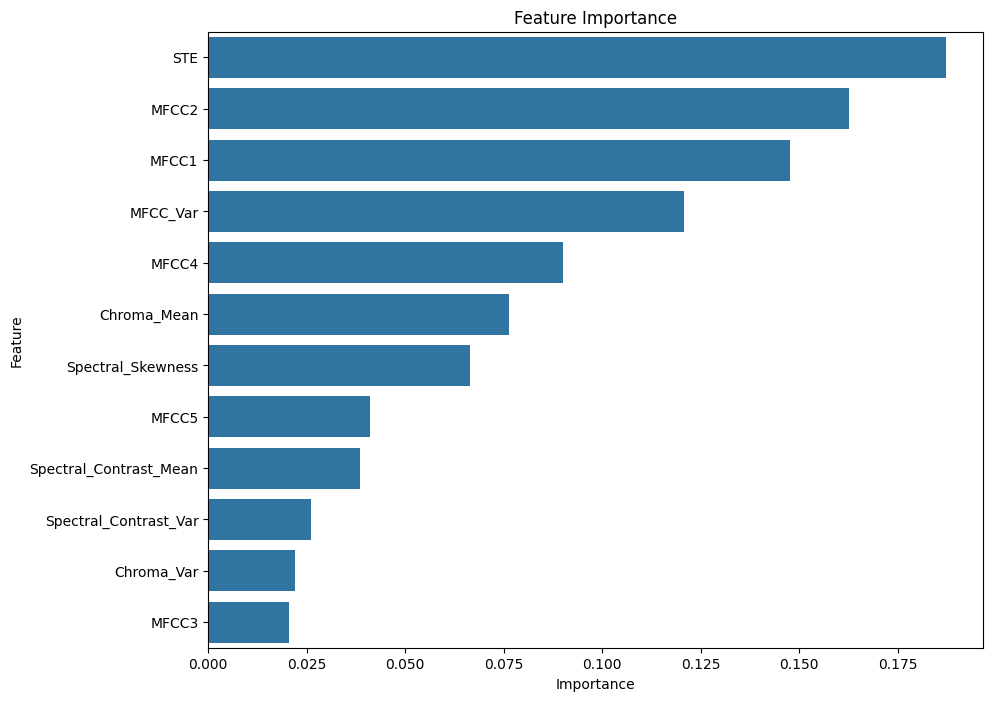

In [123]:
# Visualize feature importance
feature_importances = rf_classifier.feature_importances_

# Feature names are the columns in X_train
feature_names = X_labeled.columns

# Create a pandas Series to view the feature importances with their corresponding feature names
importances = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
sorted_importances = importances.sort_values(ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [126]:
# calculate succes rate of the algorithm withregards to the validation data
success_rate = np.mean(Y_validation == Y_pred)
print(f'Success rate: {success_rate}')



Success rate: 1.0
